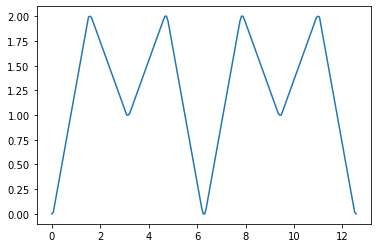

In [1]:
from jax_circuits import *
from cp_utils import *
from topology import *
from matrix_utils import *
from scipy.stats import unitary_group

import matplotlib.pyplot as plt
from hyperopt import plotting

u_target = unitary_group.rvs(4, random_state=0)
d = Decompose(sequ_layer(2), u_target=u_target)
sweep = jnp.linspace(0, 4*jnp.pi, 200)
plt.plot(sweep, vmap(d.cp_regularization_func)(sweep))

In [19]:
n = 6

u_rnd = unitary_group.rvs(4, random_state=0)
u_diag = jnp.diag(jnp.exp(1j*jnp.arange(1,2**n+1, dtype=jnp.complex64))).reshape([2]*(2*n))

u = jnp.identity(2**n).reshape([2]*(2*n))
u = apply_gate_to_tensor(u_diag, u, list(range(n)))

u =  apply_gate_to_tensor(u_rnd.reshape(2,2,2,2), u, [2, 4])
u = apply_gate_to_tensor(x_mat, u, [1]).reshape(2**n, 2**n)

                         
wires = [0,3,5]
print(tensor_identity_loss_frobenius(u,  wires))
print(tensor_identity_loss(u,  wires))
print(tensor_diagonal_loss(u,  wires))


# u_diag, u_diag_shifted, u_off_diag = tensor_identity_loss(u,  [0, 1])

117.52797
0.5590403
0.0


In [186]:
A = df(u_diag)
A.columns = ['']*A.shape[1]
print(A.to_string(index=False))
A = df(u_diag_shifted)
A.columns = ['']*A.shape[1]
print(A.to_string(index=False))
# print(df(u_diag))
# print(df(u_diag_shifted))

                                                                                                                
0.364356+0.308594j 0.558925+0.076750j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+000000.000000j  0.0+000000.000000j
0.385735-0.527307j 0.344763+0.551238j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+000000.000000j  0.0+000000.000000j
 -0.00000+0.00000j 0.0+000000.000000j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+0.0j  -0.00000+0.00000j  0.0+000000.000000j
0.0+000000.000000j 0.0+000000.000000j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+000000.000000j  0.0+000000.000000j
0.0+000000.000000j 0.0+000000.000000j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+000000.000000j  0.0+000000.000000j
 -0.00000+0.00000j  -0.00000+0.00000j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+0.0j  -0.00000+0.00000j -0.000000+0.000000j
0.0+000000.000000j  -0.00000+0.00000j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.084125-0.470633j -0.560447+0.197538j
0.0+000000.000000j 0.0-000000.000000j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.0+0.0j 0.052160+0.795844j -0.

In [ ]:
u

In [116]:
m = jnp.arange(16).reshape(4,4)
m

DeviceArray([[ 0,  1,  2,  3],
             [ 4,  5,  6,  7],
             [ 8,  9, 10, 11],
             [12, 13, 14, 15]], dtype=int32)

In [117]:
tensor_split(m, 2)

(DeviceArray([[ 0.,  0.,  0.,  0.],
              [ 0.,  5.,  0.,  0.],
              [ 0.,  0., 10.,  0.],
              [ 0.,  0.,  0., 15.]], dtype=float32),
 DeviceArray([[ 0.,  1.,  2.,  3.],
              [ 4.,  5.,  6.,  7.],
              [ 8.,  9., 10., 11.],
              [12., 13., 14., 15.]], dtype=float32),
 DeviceArray([[ 0.,  1.,  2.,  3.],
              [ 4.,  0.,  6.,  7.],
              [ 8.,  9.,  0., 11.],
              [12., 13., 14.,  0.]], dtype=float32))

In [106]:
tm = jnp.array([[0,1,0,0,0,0],[2,3,0,0,0,0],[0,0,4,5,0,0],[0,0,6,7,0,0],[0,0,0,0,8,9],[0,0,0,0,10,11]])
contains_identity(jnp.identity(2**3), 1)

(DeviceArray([[1., 1., 1., 1., 0., 0., 0., 0.],
              [1., 1., 1., 1., 0., 0., 0., 0.],
              [1., 1., 1., 1., 0., 0., 0., 0.],
              [1., 1., 1., 1., 0., 0., 0., 0.],
              [0., 0., 0., 0., 1., 1., 1., 1.],
              [0., 0., 0., 0., 1., 1., 1., 1.],
              [0., 0., 0., 0., 1., 1., 1., 1.],
              [0., 0., 0., 0., 1., 1., 1., 1.]], dtype=float32),
 DeviceArray([[0., 0., 0., 0., 1., 1., 1., 1.],
              [0., 0., 0., 0., 1., 1., 1., 1.],
              [0., 0., 0., 0., 1., 1., 1., 1.],
              [0., 0., 0., 0., 1., 1., 1., 1.],
              [1., 1., 1., 1., 0., 0., 0., 0.],
              [1., 1., 1., 1., 0., 0., 0., 0.],
              [1., 1., 1., 1., 0., 0., 0., 0.],
              [1., 1., 1., 1., 0., 0., 0., 0.]], dtype=float32))

In [90]:
shift_block_diagonal_matrix(tm, 2)

DeviceArray([[ 4.,  5.,  0.,  0.,  0.,  0.],
             [ 6.,  7.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  8.,  9.,  0.,  0.],
             [ 0.,  0., 10., 11.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  1.],
             [ 0.,  0.,  0.,  0.,  2.,  3.]], dtype=float32)

In [79]:
shift_matrix(jnp.diag(jnp.linspace(1,4,4)))

DeviceArray([[2., 0., 0., 0.],
             [0., 3., 0., 0.],
             [0., 0., 4., 0.],
             [0., 0., 0., 1.]], dtype=float32)

In [78]:
shift_matrix(jnp.array([[0,1, 2],[3,4, 5],[6,7,8]]))

DeviceArray([[4., 5., 3.],
             [7., 8., 6.],
             [1., 2., 0.]], dtype=float32)

In [74]:
vkron = jnp.kron(jnp.identity(3), jnp.diag(jnp.linspace(1, 3, 3)))
contains_identity(vkron, 2)

TypeError: dot_general requires contracting dimensions to have the same shape, got [8] and [9].

In [67]:
ukron = jnp.kron(jnp.diag(jnp.linspace(1, 3, 3)), jnp.identity(3))
ukron

DeviceArray([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
             [0., 1., 0., 0., 0., 0., 0., 0., 0.],
             [0., 0., 1., 0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 2., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 2., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 2., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0., 3., 0., 0.],
             [0., 0., 0., 0., 0., 0., 0., 3., 0.],
             [0., 0., 0., 0., 0., 0., 0., 0., 3.]], dtype=float32)

In [68]:
shift_kronecker_product(ukron, 3)

DeviceArray([[2., 0., 0., 0., 0., 0., 0., 0., 0.],
             [0., 2., 0., 0., 0., 0., 0., 0., 0.],
             [0., 0., 2., 0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 3., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 3., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 3., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0., 1., 0., 0.],
             [0., 0., 0., 0., 0., 0., 0., 1., 0.],
             [0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [54]:
shift_matrix(jnp.diag(jnp.linspace(1, 5, 5)))

DeviceArray([[2., 0., 0., 0., 0.],
             [0., 3., 0., 0., 0.],
             [0., 0., 4., 0., 0.],
             [0., 0., 0., 5., 0.],
             [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
shift_matrix(jnp.diag(jnp.linspace(1, 5, 5)))

In [44]:
shift_matrix(3)@shift_matrix(3)@shift_matrix(3)

DeviceArray([[1., 0., 0.],
             [0., 1., 0.],
             [0., 0., 1.]], dtype=float32)

In [41]:
jnp.diag(jnp.array([1., 2., 3.]))

DeviceArray([[1., 0., 0.],
             [0., 2., 0.],
             [0., 0., 3.]], dtype=float32)

In [50]:
shift_matrix(4)@jnp.diag(jnp.array([1., 2., 3., 4.]))@shift_matrix(4)@shift_matrix(4)@shift_matrix(4)

DeviceArray([[2., 0., 0., 0.],
             [0., 3., 0., 0.],
             [0., 0., 4., 0.],
             [0., 0., 0., 1.]], dtype=float32)

# Reconstruction

# Toffoli 4

## Square

In [11]:
layer = [[0,1], [1,2], [2,3], [3,0]]

u_target = u_toff4
decomposer = Decompose(layer, u_target=u_target)

static_options = {'batch_size':300}
adaptive_options = {
    'max_evals': 50,
    'evals_between_verification': 1,
    'min_num_cp_gates': 14,
    'max_num_cp_gates': 35,
    'target_num_gates': 15}

adaptive_results = decomposer.adaptive(
    static_options=static_options,
    adaptive_options=adaptive_options,
    save_to='data/toff4_square/',
    overwrite_existing_trials=False,
    overwrite_existing_decompositions=False)


Starting decomposition routine with the following options:

Static:
{'accepted_num_gates': None,
 'batch_size': 300,
 'cp_dist': 'uniform',
 'entry_loss': 0.001,
 'learning_rate': 0.01,
 'method': 'adam',
 'num_gd_iterations': 2000,
 'target_loss': 1e-06,
 'threshold_cp': 0.2}

Adaptive:
{'evals_between_verification': 1,
 'hyperopt_random_seed': 0,
 'max_evals': 50,
 'max_num_cp_gates': 35,
 'min_num_cp_gates': 14,
 'r_mean': 0.00055,
 'r_variance': 0.5,
 'stop_if_target_reached': True,
 'target_num_gates': 15}



Found existing trials, resuming from here.


Epochs:   0%|                                                                                                                      | 0/50 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 161/161 [03:27<00:00, 207.89s/trial, best loss: -0.008426151238381863]

Epochs:   2%|██▏                                                                                                        | 1/50 [03:28<2:49:54, 208.06s/it]



Found no better decompositions. Found 0 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 162/162 [03:42<00:00, 222.21s/trial, best loss: -0.008426151238381863]

Epochs:   4%|████▎                                                                                                      | 2/50 [07:10<2:53:10, 216.46s/it]



Found no better decompositions. Found 0 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 163/163 [03:49<00:00, 229.16s/trial, best loss: -0.008426151238381863]

Epochs:   6%|██████▍                                                                                                    | 3/50 [10:59<2:54:08, 222.31s/it]



Found no better decompositions. Found 0 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [03:31<00:00, 211.36s/trial, best loss: -0.008426151238381863]

Epochs:   8%|████████▌                                                                                                  | 4/50 [14:31<2:47:09, 218.04s/it]



Found no better decompositions. Found 0 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 165/165 [03:35<00:00, 215.14s/trial, best loss: -0.008426151238381863]

Epochs:  10%|██████████▋                                                                                                | 5/50 [18:06<2:42:46, 217.04s/it]



Found no better decompositions. Found 1 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 166/166 [03:53<00:00, 233.86s/trial, best loss: -0.008426151238381863]

Epochs:  12%|████████████▊                                                                                              | 6/50 [22:00<2:43:23, 222.80s/it]



Found no better decompositions. Found 0 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 167/167 [03:27<00:00, 207.23s/trial, best loss: -0.008426151238381863]

Epochs:  14%|██████████████▉                                                                                            | 7/50 [25:27<2:36:03, 217.75s/it]



Found no better decompositions. Found 0 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [03:39<00:00, 219.06s/trial, best loss: -0.008426151238381863]

Epochs:  16%|█████████████████                                                                                          | 8/50 [29:06<2:32:45, 218.22s/it]



Found no better decompositions. Found 0 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 169/169 [03:19<00:00, 199.89s/trial, best loss: -0.008426151238381863]

Epochs:  18%|███████████████████▎                                                                                       | 9/50 [32:27<2:25:13, 212.53s/it]



Found no better decompositions. Found 0 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 170/170 [03:38<00:00, 218.59s/trial, best loss: -0.008426151238381863]

Epochs:  20%|█████████████████████▏                                                                                    | 10/50 [36:05<2:22:57, 214.44s/it]



Found no better decompositions. Found 1 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 171/171 [03:23<00:00, 203.33s/trial, best loss: -0.008426151238381863]

Epochs:  22%|███████████████████████▎                                                                                  | 11/50 [39:29<2:17:12, 211.09s/it]



Found no better decompositions. Found 2 decompositions with the current best count 17.

100%|█████████████████████████████████████████████████████████████████████████████| 172/172 [03:16<00:00, 196.93s/trial, best loss: -0.008426151238381863]

Found 1 decompositions potentially better than current best count 17, verifying...
vefigying with options
{'cp_dist': 'uniform', 'entry_loss': 0.001, 'target_loss': 1e-06, 'threshold_cp': 0.2, 'batch_size': 300, 'num_gd_iterations': 2000, 'method': 'adam', 'learning_rate': 0.01, 'accepted_num_gates': None}


Epochs:  24%|█████████████████████████▍                                                                                | 12/50 [43:26<2:18:46, 219.13s/it]


Found new decomposition with 16 gates.


100%|█████████████████████████████████████████████████████████████████████████████| 173/173 [02:37<00:00, 157.44s/trial, best loss: -0.008426151238381863]

Epochs:  26%|███████████████████████████▌                                                                              | 13/50 [46:04<2:03:38, 200.49s/it]



Found no better decompositions. Found 0 decompositions with the current best count 16.

100%|█████████████████████████████████████████████████████████████████████████████| 174/174 [03:46<00:00, 226.80s/trial, best loss: -0.008426151238381863]

Epochs:  28%|█████████████████████████████▋                                                                            | 14/50 [49:51<2:05:05, 208.48s/it]



Found no better decompositions. Found 0 decompositions with the current best count 16.

100%|█████████████████████████████████████████████████████████████████████████████| 175/175 [03:34<00:00, 214.29s/trial, best loss: -0.008426151238381863]

Epochs:  30%|███████████████████████████████▊                                                                          | 15/50 [53:25<2:02:39, 210.28s/it]



Found no better decompositions. Found 0 decompositions with the current best count 16.

100%|█████████████████████████████████████████████████████████████████████████████| 176/176 [02:50<00:00, 170.13s/trial, best loss: -0.008426151238381863]

Epochs:  32%|█████████████████████████████████▉                                                                        | 16/50 [56:15<1:52:19, 198.23s/it]



Found no better decompositions. Found 1 decompositions with the current best count 16.

100%|█████████████████████████████████████████████████████████████████████████████| 177/177 [02:30<00:00, 150.07s/trial, best loss: -0.008426151238381863]

Epochs:  34%|████████████████████████████████████                                                                      | 17/50 [58:46<1:41:05, 183.79s/it]



Found no better decompositions. Found 0 decompositions with the current best count 16.

100%|█████████████████████████████████████████████████████████████████████████████| 178/178 [02:43<00:00, 163.38s/trial, best loss: -0.008426151238381863]

Epochs:  36%|█████████████████████████████████████▍                                                                  | 18/50 [1:01:29<1:34:46, 177.70s/it]



Found no better decompositions. Found 0 decompositions with the current best count 16.

100%|█████████████████████████████████████████████████████████████████████████████| 179/179 [02:48<00:00, 168.05s/trial, best loss: -0.008426151238381863]

Epochs:  38%|███████████████████████████████████████▌                                                                | 19/50 [1:04:17<1:30:20, 174.85s/it]



Found no better decompositions. Found 0 decompositions with the current best count 16.

100%|█████████████████████████████████████████████████████████████████████████████| 180/180 [02:51<00:00, 171.59s/trial, best loss: -0.008426151238381863]

Epochs:  40%|█████████████████████████████████████████▌                                                              | 20/50 [1:07:09<1:26:57, 173.91s/it]



Found no better decompositions. Found 0 decompositions with the current best count 16.

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 180/181 [02:35<?, ?trial/s, best loss=?]

Epochs:  40%|█████████████████████████████████████████▌                                                              | 20/50 [1:09:44<1:44:37, 209.25s/it]

KeyboardInterrupt: 

avg best error: -0.008426151238381863


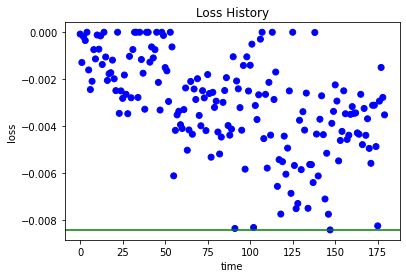

finite loss range -0.008426151238381863 -0.0 -1.0084261512383819


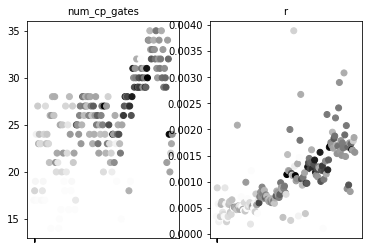

In [12]:
trials, decompositions = Decompose.load_trials_and_decompositions(st)
plotting.main_plot_history(trials)
plotting.main_plot_vars(trials)

## Chain

In [ ]:
layer = chain_layer(4)

u_target = u_toff4
decomposer = Decompose(layer, u_target=u_target)
st = 'data/toff4_chain/'

static_options = {
    'batch_size':400}

adaptive_options = {
    'max_evals': 200,
    'evals_between_verification': 1,
    'min_num_cp_gates': 27,
    'max_num_cp_gates': 32,
    'target_num_gates': 16}

adaptive_results = decomposer.adaptive(
    static_options=static_options,
    adaptive_options=adaptive_options,
    save_to=st,
    overwrite_existing_trials=False,
    overwrite_existing_decompositions=False)


Starting decomposition routine with the following options:

Static:
{'accepted_num_gates': None,
 'batch_size': 400,
 'cp_dist': 'uniform',
 'entry_loss': 0.001,
 'learning_rate': 0.01,
 'method': 'adam',
 'num_gd_iterations': 2000,
 'target_loss': 1e-06,
 'threshold_cp': 0.2}

Adaptive:
{'evals_between_verification': 1,
 'hyperopt_random_seed': 0,
 'max_evals': 200,
 'max_num_cp_gates': 32,
 'min_num_cp_gates': 27,
 'r_mean': 0.00055,
 'r_variance': 0.5,
 'stop_if_target_reached': True,
 'target_num_gates': 16}



Found existing trials, resuming from here.


Epochs:   0%|                                                                                                                     | 0/200 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 167/167 [05:40<00:00, 340.90s/trial, best loss: -0.001399621949531138]

Epochs:   0%|▌                                                                                                        | 1/200 [05:41<18:51:13, 341.07s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [05:47<00:00, 347.27s/trial, best loss: -0.001399621949531138]

Epochs:   1%|█                                                                                                        | 2/200 [11:28<18:57:51, 344.81s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 169/169 [05:47<00:00, 347.88s/trial, best loss: -0.001399621949531138]

Epochs:   2%|█▌                                                                                                       | 3/200 [17:16<18:56:56, 346.28s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 170/170 [05:29<00:00, 329.51s/trial, best loss: -0.001399621949531138]

Epochs:   2%|██                                                                                                       | 4/200 [22:46<18:29:47, 339.73s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 171/171 [05:18<00:00, 318.45s/trial, best loss: -0.001399621949531138]

Epochs:   2%|██▋                                                                                                      | 5/200 [28:04<17:59:20, 332.11s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 172/172 [05:22<00:00, 322.61s/trial, best loss: -0.001399621949531138]

Epochs:   3%|███▏                                                                                                     | 6/200 [33:27<17:43:32, 328.93s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 173/173 [05:36<00:00, 336.90s/trial, best loss: -0.001399621949531138]

Epochs:   4%|███▋                                                                                                     | 7/200 [39:04<17:46:36, 331.59s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 174/174 [05:23<00:00, 323.81s/trial, best loss: -0.001399621949531138]

Epochs:   4%|████▏                                                                                                    | 8/200 [44:28<17:33:19, 329.16s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 175/175 [05:34<00:00, 334.94s/trial, best loss: -0.001399621949531138]

Epochs:   4%|████▋                                                                                                    | 9/200 [50:03<17:33:43, 331.01s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 176/176 [05:25<00:00, 325.89s/trial, best loss: -0.001399621949531138]

Epochs:   5%|█████▏                                                                                                  | 10/200 [55:29<17:23:21, 329.48s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 177/177 [05:16<00:00, 316.65s/trial, best loss: -0.001399621949531138]

Epochs:   6%|█████▌                                                                                                | 11/200 [1:00:46<17:05:39, 325.60s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 178/178 [05:23<00:00, 323.01s/trial, best loss: -0.001399621949531138]

Epochs:   6%|██████                                                                                                | 12/200 [1:06:09<16:57:54, 324.86s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 179/179 [05:16<00:00, 316.51s/trial, best loss: -0.001399621949531138]

Epochs:   6%|██████▋                                                                                               | 13/200 [1:11:26<16:44:45, 322.38s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 180/180 [05:58<00:00, 358.99s/trial, best loss: -0.001399621949531138]

Epochs:   7%|███████▏                                                                                              | 14/200 [1:17:25<17:13:50, 333.49s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 181/181 [06:06<00:00, 366.40s/trial, best loss: -0.001399621949531138]

Epochs:   8%|███████▋                                                                                              | 15/200 [1:23:32<17:39:00, 343.46s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 182/182 [05:20<00:00, 320.83s/trial, best loss: -0.001399621949531138]

Epochs:   8%|████████▏                                                                                             | 16/200 [1:28:53<17:12:33, 336.71s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 183/183 [05:39<00:00, 339.38s/trial, best loss: -0.001399621949531138]

Epochs:   8%|████████▋                                                                                             | 17/200 [1:34:32<17:09:34, 337.57s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 184/184 [05:24<00:00, 324.39s/trial, best loss: -0.001399621949531138]

Epochs:   9%|█████████▏                                                                                            | 18/200 [1:39:57<16:52:05, 333.66s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 185/185 [05:26<00:00, 326.20s/trial, best loss: -0.001399621949531138]

Epochs:  10%|█████████▋                                                                                            | 19/200 [1:45:23<16:39:55, 331.46s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 186/186 [05:40<00:00, 340.43s/trial, best loss: -0.001399621949531138]

Epochs:  10%|██████████▏                                                                                           | 20/200 [1:51:04<16:42:38, 334.22s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 187/187 [05:23<00:00, 323.36s/trial, best loss: -0.001399621949531138]

Epochs:  10%|██████████▋                                                                                           | 21/200 [1:56:27<16:27:29, 331.00s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 188/188 [05:27<00:00, 327.12s/trial, best loss: -0.001399621949531138]

Epochs:  11%|███████████▏                                                                                          | 22/200 [2:01:55<16:18:39, 329.88s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 189/189 [05:35<00:00, 335.08s/trial, best loss: -0.001399621949531138]

Epochs:  12%|███████████▋                                                                                          | 23/200 [2:07:30<16:17:53, 331.49s/it]



Found no better decompositions. Found 1 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 190/190 [05:39<00:00, 339.44s/trial, best loss: -0.001399621949531138]

Epochs:  12%|████████████▏                                                                                         | 24/200 [2:13:09<16:19:31, 333.93s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 191/191 [05:40<00:00, 340.85s/trial, best loss: -0.001399621949531138]

Epochs:  12%|████████████▊                                                                                         | 25/200 [2:18:50<16:20:10, 336.06s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 192/192 [05:24<00:00, 324.50s/trial, best loss: -0.001399621949531138]

Epochs:  13%|█████████████▎                                                                                        | 26/200 [2:24:15<16:04:38, 332.64s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 193/193 [05:38<00:00, 338.22s/trial, best loss: -0.001399621949531138]

Epochs:  14%|█████████████▊                                                                                        | 27/200 [2:29:53<16:04:03, 334.36s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 194/194 [05:30<00:00, 330.70s/trial, best loss: -0.001399621949531138]

Epochs:  14%|██████████████▎                                                                                       | 28/200 [2:35:24<15:55:29, 333.31s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 195/195 [05:48<00:00, 348.72s/trial, best loss: -0.001399621949531138]

Epochs:  14%|██████████████▊                                                                                       | 29/200 [2:41:13<16:03:15, 337.99s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 196/196 [05:38<00:00, 338.61s/trial, best loss: -0.001399621949531138]

Epochs:  15%|███████████████▎                                                                                      | 30/200 [2:46:52<15:58:17, 338.22s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 197/197 [05:49<00:00, 349.90s/trial, best loss: -0.001399621949531138]

Epochs:  16%|███████████████▊                                                                                      | 31/200 [2:52:42<16:02:39, 341.77s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 198/198 [05:20<00:00, 320.19s/trial, best loss: -0.001399621949531138]

Epochs:  16%|████████████████▎                                                                                     | 32/200 [2:58:02<15:38:58, 335.35s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 199/199 [05:24<00:00, 324.05s/trial, best loss: -0.001399621949531138]

Epochs:  16%|████████████████▊                                                                                     | 33/200 [3:03:27<15:24:06, 332.01s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [05:38<00:00, 338.46s/trial, best loss: -0.001399621949531138]

Epochs:  17%|█████████████████▎                                                                                    | 34/200 [3:09:05<15:24:04, 334.01s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 201/201 [05:24<00:00, 324.98s/trial, best loss: -0.001399621949531138]

Epochs:  18%|█████████████████▊                                                                                    | 35/200 [3:14:30<15:11:12, 331.35s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 202/202 [05:35<00:00, 335.49s/trial, best loss: -0.001399621949531138]

Epochs:  18%|██████████████████▎                                                                                   | 36/200 [3:20:06<15:09:13, 332.64s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 203/203 [05:22<00:00, 322.69s/trial, best loss: -0.001399621949531138]

Epochs:  18%|██████████████████▊                                                                                   | 37/200 [3:25:29<14:55:41, 329.70s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 204/204 [05:27<00:00, 327.35s/trial, best loss: -0.001399621949531138]

Epochs:  19%|███████████████████▍                                                                                  | 38/200 [3:30:56<14:48:26, 329.05s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 205/205 [05:41<00:00, 341.90s/trial, best loss: -0.001399621949531138]

Epochs:  20%|███████████████████▉                                                                                  | 39/200 [3:36:39<14:53:26, 332.96s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 206/206 [05:46<00:00, 346.47s/trial, best loss: -0.001399621949531138]

Epochs:  20%|████████████████████▍                                                                                 | 40/200 [3:42:25<14:58:50, 337.06s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 207/207 [05:26<00:00, 326.74s/trial, best loss: -0.001399621949531138]

Epochs:  20%|████████████████████▉                                                                                 | 41/200 [3:47:52<14:45:09, 334.02s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 208/208 [05:21<00:00, 321.05s/trial, best loss: -0.001399621949531138]

Epochs:  21%|█████████████████████▍                                                                                | 42/200 [3:53:13<14:29:29, 330.19s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 209/209 [05:00<00:00, 300.74s/trial, best loss: -0.001399621949531138]

Epochs:  22%|█████████████████████▉                                                                                | 43/200 [3:58:14<14:00:59, 321.40s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|█████████████████████████████████████████████████████████████████████████████| 210/210 [05:14<00:00, 314.60s/trial, best loss: -0.001399621949531138]

Epochs:  22%|██████████████████████▍                                                                               | 44/200 [4:03:29<13:50:28, 319.41s/it]



Found no better decompositions. Found 0 decompositions with the current best count 18.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 210/211 [00:00<?, ?trial/s, best loss=?]

avg best error: -0.001399621949531138


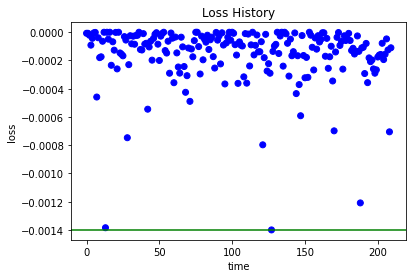

finite loss range -0.001399621949531138 -0.0 -1.0013996219495311


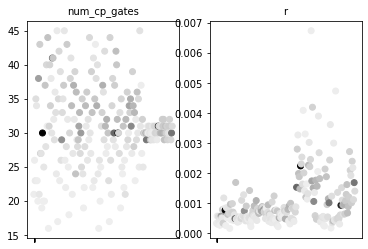

In [2]:
trials, decompositions = Decompose.load_trials_and_decompositions('data/toff4_chain/')
plotting.main_plot_history(trials)
plotting.main_plot_vars(trials)

In [3]:
layer = [[0,1], [0,2], [0,3]]

u_target = u_toff4
decomposer = Decompose(layer, u_target=u_target)

static_options = {'batch_size':5000,
                 'accepted_num_gates': 17}

static_results = decomposer.static(
    41,
    0.003472913211387546,
    key=random.PRNGKey(2),
    options=static_options,
    save_to='data/toff4_star/',
    overwrite_existing=False,
    )


Starting decomposition routine with the following options:

{'accepted_num_gates': 17,
 'batch_size': 5000,
 'cp_dist': 'uniform',
 'entry_loss': 0.001,
 'learning_rate': 0.01,
 'method': 'adam',
 'num_gd_iterations': 2000,
 'target_loss': 1e-06,
 'threshold_cp': 0.2}

Computing raw results...

Selecting prospective results...


5000it [00:04, 1101.03it/s]

No results passed.


In [4]:
layer = [[0,1], [0,2], [0,3]]

u_target = u_toff4
decomposer = Decompose(layer, u_target=u_target)

static_options = {'batch_size':5000,
                 'accepted_num_gates': 17}

static_results = decomposer.static(
    41,
    0.003472913211387546,
    key=random.PRNGKey(101),
    options=static_options,
    save_to='data/toff4_star/',
    overwrite_existing=False,
    )


Starting decomposition routine with the following options:

{'accepted_num_gates': 17,
 'batch_size': 5000,
 'cp_dist': 'uniform',
 'entry_loss': 0.001,
 'learning_rate': 0.01,
 'method': 'adam',
 'num_gd_iterations': 2000,
 'target_loss': 1e-06,
 'threshold_cp': 0.2}

Computing raw results...

Selecting prospective results...


5000it [00:02, 1810.54it/s]

No results passed.


# Toffoli 3

## Relative phase

In [25]:
u_target = u_toff3
layer = sequ_layer(3)
unitary_loss_func = lambda u: (jnp.abs(jnp.abs(u)-u_toff3)**2).sum()/(u_toff3.shape[0]**2)

decomposer = Decompose(layer, unitary_loss_func=unitary_loss_func)

static_options = {'batch_size': 20, 'accepted_num_gates': 4}

adaptive_options = {'max_evals':20,
                   'max_num_cp_gates':8,
                   'min_num_cp_gates':2,
                   'target_num_gates': 3,
                   'evals_between_verification':1,
                   'stop_if_target_reached': False}


results = decomposer.adaptive(
    static_options=static_options,
    adaptive_options = adaptive_options,
    save_to = 'data/toff3_relative/',
    overwrite_existing_trials=False,
    overwrite_existing_decompositions=False,
)


Starting decomposition routine with the following options:

Static:
{'accepted_num_gates': 4,
 'batch_size': 20,
 'cp_dist': 'uniform',
 'entry_loss': 0.001,
 'learning_rate': 0.01,
 'method': 'adam',
 'num_gd_iterations': 2000,
 'target_loss': 1e-06,
 'threshold_cp': 0.2}

Adaptive:
{'evals_between_verification': 1,
 'hyperopt_random_seed': 0,
 'max_evals': 20,
 'max_num_cp_gates': 8,
 'min_num_cp_gates': 2,
 'r_mean': 0.00055,
 'r_variance': 0.5,
 'stop_if_target_reached': False,
 'target_num_gates': 3}




Epochs:   0%|                                                                                                                      | 0/20 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.32s/trial, best loss: -0.0]

Epochs:   5%|█████▌                                                                                                        | 1/20 [00:17<05:29, 17.33s/it]



Found no better decompositions. Found 0 decompositions with the current best count 14.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:20<00:00, 20.54s/trial, best loss: -0.0]

Epochs:  10%|███████████                                                                                                   | 2/20 [00:37<05:46, 19.23s/it]



Found no better decompositions. Found 0 decompositions with the current best count 14.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:16<00:00, 16.96s/trial, best loss: -0.0]

Epochs:  15%|████████████████▌                                                                                             | 3/20 [00:54<05:09, 18.20s/it]



Found no better decompositions. Found 0 decompositions with the current best count 14.

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:23<00:00, 23.10s/trial, best loss: -0.30937498807907104]

Found 20 decompositions potentially better than current best count 14, verifying...
vefigying with options
{'cp_dist': 'uniform', 'entry_loss': 0.001, 'target_loss': 1e-06, 'threshold_cp': 0.2, 'batch_size': 20, 'num_gd_iterations': 2000, 'method': 'adam', 'learning_rate': 0.01, 'accepted_num_gates': 4}


Epochs:  20%|██████████████████████                                                                                        | 4/20 [01:40<07:47, 29.21s/it]


Found new decomposition with 3 gates.


 80%|████████████████████████████████████████████████████████████████████████████████████████▊                      | 4/5 [00:10<?, ?trial/s, best loss=?]

Epochs:  20%|██████████████████████                                                                                        | 4/20 [01:51<07:24, 27.78s/it]

KeyboardInterrupt: 

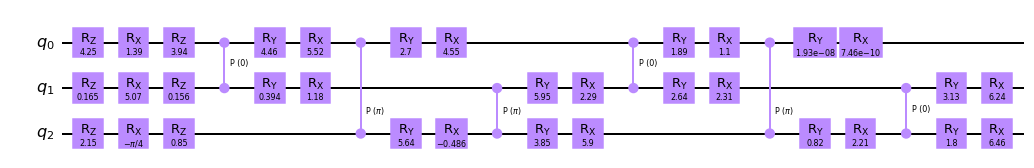

In [33]:
cz, circ, u , angs = decompositions[-1]
circ(angs).draw(output='mpl')

avg best error: -0.30937498807907104


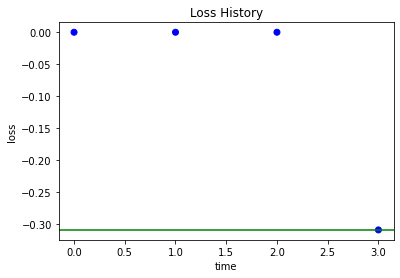

finite loss range -0.30937498807907104 -0.0 -1.309374988079071


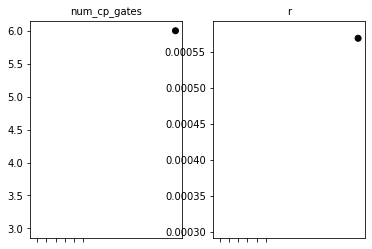

In [31]:
trials, decompositions = Decompose.load_trials_and_decompositions('data/toff3_relative/')
plotting.main_plot_history(trials)
plotting.main_plot_vars(trials)

## Chain with 7 gates up to a swap

In [85]:
u_target = u_toff3
layer = chain_layer(3)
unitary_loss_func = lambda u: disc2_swap(u, u_target, 3)

decomposer = Decompose(layer, unitary_loss_func=unitary_loss_func)

static_options = {'batch_size': 100, 'accepted_num_gates': 8}

adaptive_options = {'max_evals':20,
                   'max_num_cp_gates':12,
                   'min_num_cp_gates':6,
                   'target_num_gates': 7,
                   'evals_between_verification':2,
                   'stop_if_target_reached': False}


results = decomposer.adaptive(
    static_options=static_options,
    adaptive_options = adaptive_options,
    save_to = 'data/toff3_chain_swap/',
    overwrite_existing_trials=False,
    overwrite_existing_decompositions=False,
)


Starting decomposition routine with the following options:

Static:
{'accepted_num_gates': 8,
 'batch_size': 100,
 'cp_dist': 'uniform',
 'entry_loss': 0.001,
 'learning_rate': 0.01,
 'method': 'adam',
 'num_gd_iterations': 2000,
 'target_loss': 1e-06,
 'threshold_cp': 0.2}

Adaptive:
{'evals_between_verification': 2,
 'hyperopt_random_seed': 0,
 'max_evals': 20,
 'max_num_cp_gates': 12,
 'min_num_cp_gates': 6,
 'r_mean': 0.00055,
 'r_variance': 0.5,
 'stop_if_target_reached': False,
 'target_num_gates': 7}




Epochs:   0%|                                                                                                                      | 0/10 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [01:08<00:00, 34.29s/trial, best loss: -0.048124998807907104]

Found 36 decompositions potentially better than current best count 14, verifying...


Epochs:  10%|███████████                                                                                                   | 1/10 [01:25<12:49, 85.49s/it]


Found new decomposition with 8 gates.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [01:02<00:00, 31.06s/trial, best loss: -0.054375000298023224]

Epochs:  20%|██████████████████████                                                                                        | 2/10 [02:27<09:34, 71.75s/it]



Found no better decompositions. Found 4 decompositions with the current best count 8.

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:59<00:00, 29.96s/trial, best loss: -0.08453124761581421]

Found 5 decompositions potentially better than current best count 8, verifying...


Epochs:  30%|█████████████████████████████████                                                                             | 3/10 [03:42<08:32, 73.16s/it]


Found new decomposition with 7 gates.


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [01:04<00:00, 32.38s/trial, best loss: -0.08453124761581421]

Epochs:  40%|████████████████████████████████████████████                                                                  | 4/10 [04:47<06:59, 69.85s/it]



Found no better decompositions. Found 1 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:56<00:00, 28.47s/trial, best loss: -0.08453124761581421]

Epochs:  50%|███████████████████████████████████████████████████████                                                       | 5/10 [05:44<05:26, 65.20s/it]



Found no better decompositions. Found 3 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:56<00:00, 28.11s/trial, best loss: -0.08453124761581421]

Epochs:  60%|██████████████████████████████████████████████████████████████████                                            | 6/10 [06:40<04:08, 62.16s/it]



Found no better decompositions. Found 0 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [01:03<00:00, 31.77s/trial, best loss: -0.09289062768220901]

Epochs:  70%|█████████████████████████████████████████████████████████████████████████████                                 | 7/10 [07:43<03:07, 62.61s/it]



Found no better decompositions. Found 4 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [01:01<00:00, 30.71s/trial, best loss: -0.09289062768220901]

Epochs:  80%|████████████████████████████████████████████████████████████████████████████████████████                      | 8/10 [08:45<02:04, 62.24s/it]



Found no better decompositions. Found 0 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [01:04<00:00, 32.22s/trial, best loss: -0.09289062768220901]

Epochs:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████           | 9/10 [09:49<01:02, 62.93s/it]



Found no better decompositions. Found 2 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00, 34.95s/trial, best loss: -0.09289062768220901]

Epochs: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [10:59<00:00, 65.98s/it]



Found no better decompositions. Found 3 decompositions with the current best count 7.


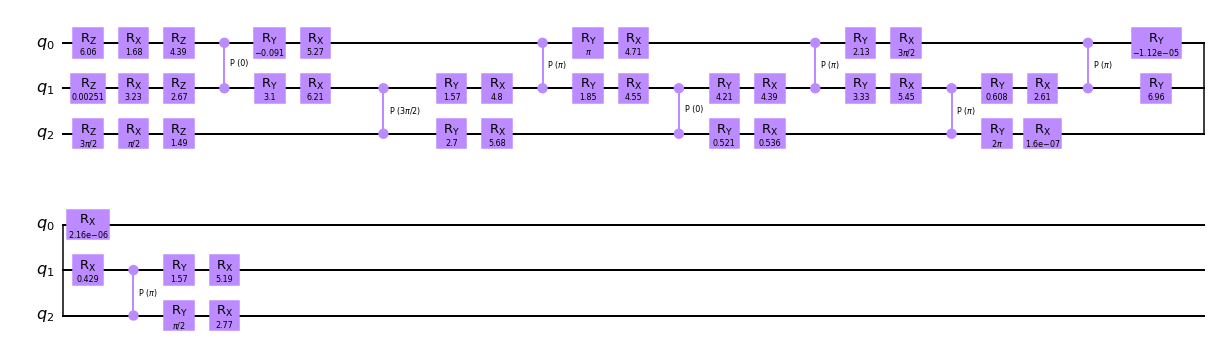

In [98]:
trials, decompositions = Decompose.load_trials_and_decompositions('data/toff3_chain_swap/')
cz, circ, u, angs = decompositions[-1]
disc2(u(angs), permutation_matrices(3)[1]@u_toff3)
circ(angs).draw(output='mpl')

## Clean ancilla

In [ ]:
qc = QuantumCircuit(5)
qc.mct([0, 1, 2], 3)
u_target = Operator(qc.reverse_bits()).data

layer = sequ_layer(5)

projector = jnp.kron(jnp.identity(2**4), jnp.array([[1,0],[0,0]], dtype=jnp.complex64))
unitary_loss_func = lambda u: disc2(u @ projector, u_target @ projector)

decomposer = Decompose(layer, unitary_loss_func=unitary_loss_func)


static_options = {'batch_size': 500, 
                  'accepted_num_gates': 15}

adaptive_options = {'max_evals':30,
                   'max_num_cp_gates':35,
                   'min_num_cp_gates':12,
                   'target_num_gates': 13,
                   'evals_between_verification':2,
                   'stop_if_target_reached': False}


adaptive_results = decomposer.adaptive(
    static_options=static_options,
    adaptive_options = adaptive_options,
    save_to = 'data/toff4_conn_clean_ancilla/',
    overwrite_existing_trials=False,
    overwrite_existing_decompositions=False,
)


Starting decomposition routine with the following options:

Static:
{'accepted_num_gates': 15,
 'batch_size': 500,
 'cp_dist': 'uniform',
 'entry_loss': 0.001,
 'learning_rate': 0.01,
 'method': 'adam',
 'num_gd_iterations': 2000,
 'target_loss': 1e-06,
 'threshold_cp': 0.2}

Adaptive:
{'evals_between_verification': 2,
 'hyperopt_random_seed': 0,
 'max_evals': 30,
 'max_num_cp_gates': 35,
 'min_num_cp_gates': 12,
 'r_mean': 0.00055,
 'r_variance': 0.5,
 'stop_if_target_reached': False,
 'target_num_gates': 13}




Epochs:   0%|                                                                                                                      | 0/15 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [17:59<00:00, 539.67s/trial, best loss: -0.0]

Epochs:   7%|███████                                                                                                   | 1/15 [17:59<4:11:51, 1079.36s/it]



Found no better decompositions. Found 0 decompositions with the current best count 253.

 75%|█████████████████████████████████████████████████████████████████████████▌                        | 3/4 [08:05<08:05, 485.54s/trial, best loss: -0.0]